# Imports

In [40]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
%pwd

'D:\\projects\\translator'

In [48]:
from fastai import *
from fastai.vision import *
from fastai.callbacks import *
import librosa
from librosa import display

In [51]:
path = Path('C:/Users/jpatn/data/translator/')
audio_fp = path/'audio'
m_audio = audio_fp/'macys'
t_audio = audio_fp/'target'
spectro_fp = path/'spectros'
m_spectros = spectro_fp/'macys'
t_spectros = spectro_fp/'target'

# Create Spectrograms

In [49]:
def create_spectros(fp,spectro,audio):
    get_sp_path = lambda x: spectro/x.relative_to(audio)
    sig,fs = librosa.load(fp)
    sv_path = str(get_sp_path(fp)).replace('wav','jpg')
    plt.axis('off')
    plt.axes([0., 0., 1., 1.], frameon=False, xticks=[], yticks=[])
    S = librosa.feature.melspectrogram(y=sig,sr=fs)
    librosa.display.specshow(librosa.power_to_db(S,ref=np.max))
    plt.savefig(sv_path,bbox_inches=None,pad_inches=0)
    plt.close()

In [105]:
for fl in get_files(m_audio):
    create_spectros(fl,m_spectros,m_audio)
for fl in get_files(t_audio):
    create_spectros(fl,t_spectros,t_audio)

# Data

In [109]:
def get_data(bs,size):
    return (ImageItemList.from_folder(spectro_fp)
           .random_split_by_pct(0.2,seed=32)
           .label_from_folder()
           .transform(get_transforms(do_flip=False),size=size)
           .databunch(bs=bs)
           .normalize(imagenet_stats))

In [110]:
data = get_data(8,224)

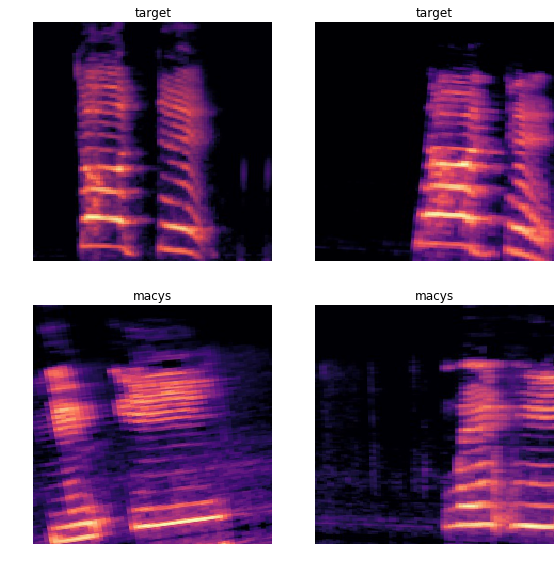

In [111]:
data.show_batch(2)

# Train 1

In [112]:
learn = create_cnn(data,models.resnet18, metrics=accuracy,
                  path=Path('D:/models/Translator/'),
                  callback_fns=[partial(SaveModelCallback,every='epoch',name='1'),
                               ShowGraph]).mixup().to_fp16()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


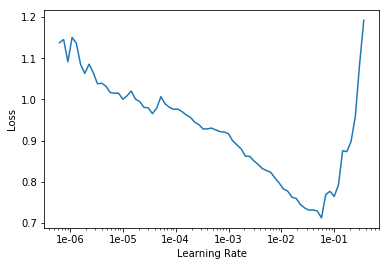

In [113]:
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy
1,1.153314,0.518744,0.750000
2,0.981936,0.442115,0.875000
3,0.834696,0.399621,1.000000
4,0.731788,0.269457,1.000000
5,0.654114,0.369572,0.625000
6,0.626472,0.127120,1.000000
7,0.609575,0.342737,0.750000
8,0.574605,1.189246,0.750000
9,0.528828,0.109530,0.875000
10,0.543074,0.217009,0.875000


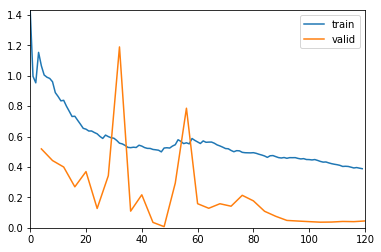

In [114]:
learn.fit_one_cycle(30,1e-2)

# End